# Pymaceuticals Inc.
---

### Analysis

* The bar chart shows Capomulin and Ramicane had the most numbers of mice tested and Propiva has the least number of mice.
* The sex of the mice is almost the same amount (49 females and 51 males)
* Over the course of 45 days, tumor development was observed and measured. Capomulin had the best results against tumors as a   reduction in the volume of tumors was observed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_data = pd.merge(mouse_metadata, study_results, how='right')


# Display the data table for preview
Combined_data = Combined_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

Combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.

number_mice = len(mouse_metadata)
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df = Combined_data[Combined_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# g989 below is duplicated
# column == value

mice_duplicated = Combined_data.loc[Combined_data['Mouse ID'] == "g989", :]
mice_duplicated

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# g989 is the ID duplicated, I need the dataframe without g989
# column != value

mice_ID = Combined_data.loc[Combined_data['Mouse ID'] != "g989", :]
mice_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.

len(mice_ID['Mouse ID'].unique())


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#Regimen and volumen... Group by Drug R.

drug_regiment = mice_ID.groupby("Drug Regimen")
#drug_regiment

tumor_volumen_mean = drug_regiment["Tumor Volume (mm3)"].mean()
#tumor_volumen_mean

tumor_volumen_median = drug_regiment["Tumor Volume (mm3)"].median()
#tumor_volumen_median

tumor_volumen_variance = drug_regiment["Tumor Volume (mm3)"].var()
#tumor_volumen_variance

tumor_volumen_std = drug_regiment["Tumor Volume (mm3)"].std()
#tumor_volumen_std

tumor_volumen_sem = drug_regiment["Tumor Volume (mm3)"].sem()
#tumor_volumen_sem




summary_stat = pd.DataFrame({"Mean Tumor Volume":tumor_volumen_mean, 
                             "Median Tumor Volume":tumor_volumen_median, 
                             "Tumor Volume Variance":tumor_volumen_variance,
                             "Tumor Volume Std. Dev.":tumor_volumen_std,
                             "Tumor Volume Std. Err.":tumor_volumen_sem})


summary_stat


# Assemble the resulting series into a single summary DataFrame.



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

# aggregation method ********** I have to review this


## Bar and Pie Charts

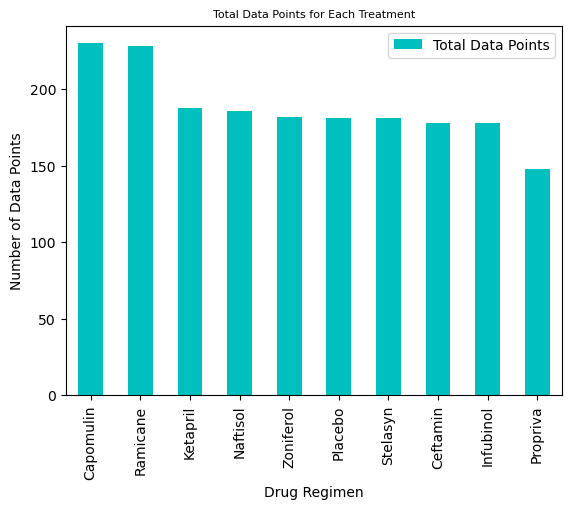

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#each drugs 
time_points = drug_regiment["Drug Regimen"].count()

time_points_df = pd.DataFrame(time_points)

#columns name
time_points_df.columns = ["Total Data Points"]

time_points_plot = time_points_df.sort_values("Total Data Points", ascending = False).plot(kind="bar", color='c') 

#names x,y
time_points_plot.set_xlabel("Drug Regimen")

time_points_plot.set_ylabel("Number of Data Points")

plt.title("Total Data Points for Each Treatment", fontsize = 8)

plt.show()

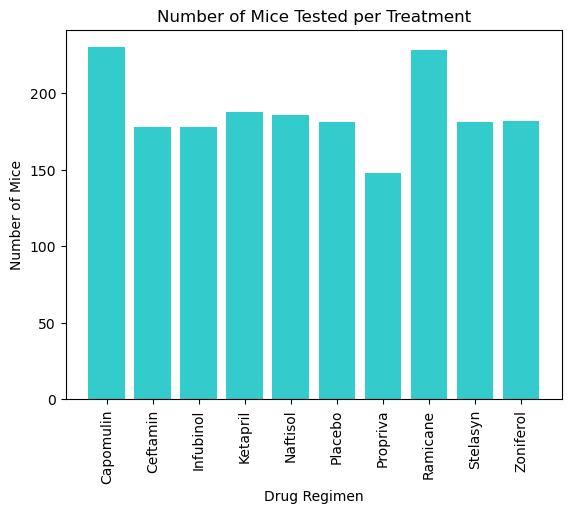

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = time_points.index.values
y_axis = time_points.values

plt.bar(x_axis, y_axis, color='c', alpha=0.8, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

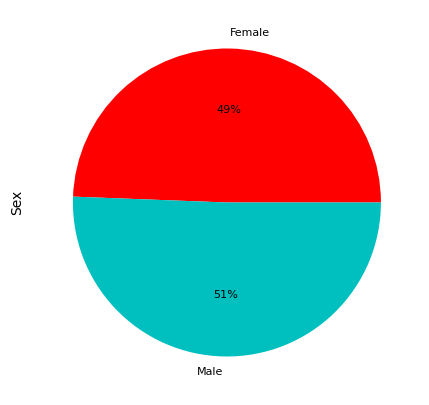

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_distribution = Combined_data.groupby("Sex")

sex_counter = sex_distribution["Sex"].count()

gender_plot = sex_counter.plot(kind = "pie", y = "Sex", autopct="%1.0f%%", fontsize=8, figsize=(5, 5),colors = ['red','c'])

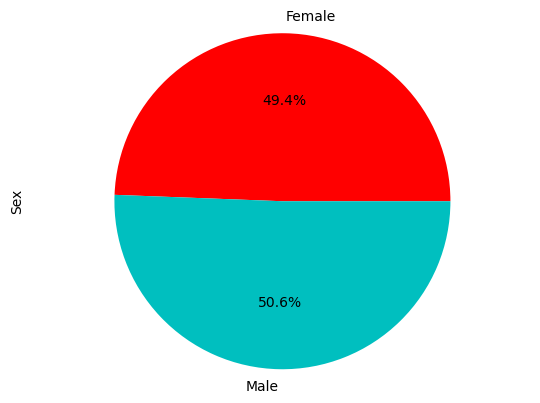

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
count = [sex_counter["Female"],sex_counter["Male"]]
plt.pie(count, labels = labels, autopct="%1.1f%%", colors = ['red','c'])
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Group by regimens above

greatest_point=mice_ID.loc[(mice_ID["Drug Regimen"]=="Capomulin")|(mice_ID["Drug Regimen"]=="Ramicane")|(mice_ID["Drug Regimen"]=="Infubinol")|(mice_ID["Drug Regimen"]=="Ceftamin") ,:]

# Start by getting the last (greatest) timepoint for each mouse
#must be max of timepoint

greatest_point=greatest_point.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

greatest_point=pd.merge(greatest_point,mice_ID[["Mouse ID","Timepoint","Tumor Volume (mm3)"]],on=["Mouse ID","Timepoint"],how="left")
greatest_point



,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

#Dictionaries

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treat_cap = []
treat_ram = []
tumor_inf = []
tumor_cef = []

for i in range(len(greatest_point)-1):
    
    if greatest_point.loc[i, "Drug Regimen"] == "Capomulin":
        treat_cap.append(greatest_point.loc[i, "Tumor Volume (mm3)"])
   
    if greatest_point.loc[i, "Drug Regimen"] == "Ramicane":
        treat_ram.append(greatest_point.loc[i, "Tumor Volume (mm3)"])
    
    if greatest_point.loc[i, "Drug Regimen"] == "Infubinol":
        tumor_inf.append(greatest_point.loc[i, "Tumor Volume (mm3)"])
    
    if greatest_point.loc[i, "Drug Regimen"] == "Ceftamin":
        tumor_cef.append(greatest_point.loc[i, "Tumor Volume (mm3)"])
        
        
            
# Put four tumor vol lists into a list for for loop
#tumor_list

tumor_list = [treat_cap, treat_ram, tumor_inf, tumor_cef]


# Create empty list to fill with tumor vol data (for plotting)


outlier_list = []

for i in range(len(tumor_list)):
    
    quartiles = pd.Series(tumor_list[i]).quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
   
    print(f'{treatments[i]}:')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    

    
    # Determine outliers using upper and lower bounds
   
    for j in range(len(tumor_list[i])):
        if (tumor_list[i][j] < lower_bound) or (tumor_list[i][j] > upper_bound):
            outlier = tumor_list[i][j]
            outlier_list.append(outlier)
            print(f"The outliers are {outlier_list}.")
  


Capomulin:
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ramicane:
Values below 20.56824767 could be outliers.
Values above 52.71694409 could be outliers.
Infubinol:
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The outliers are [36.3213458].
Ceftamin:
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

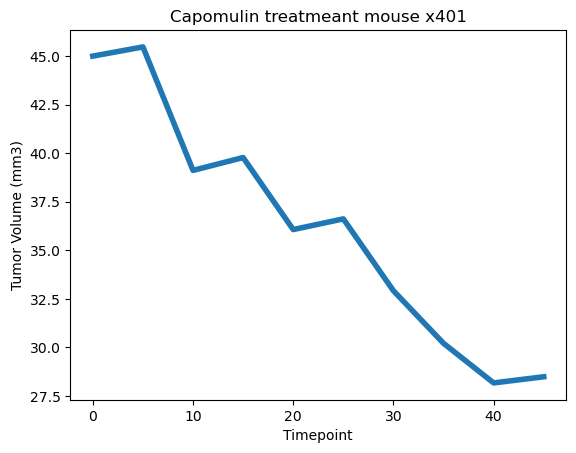

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_chart = mice_ID.loc[mice_ID["Mouse ID"] == "x401",:]
line_chart

x_axis = line_chart["Timepoint"] 

tumor_size = line_chart["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant mouse x401') 


plt.plot(x_axis, tumor_size, linewidth=4, markersize=10) 

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')



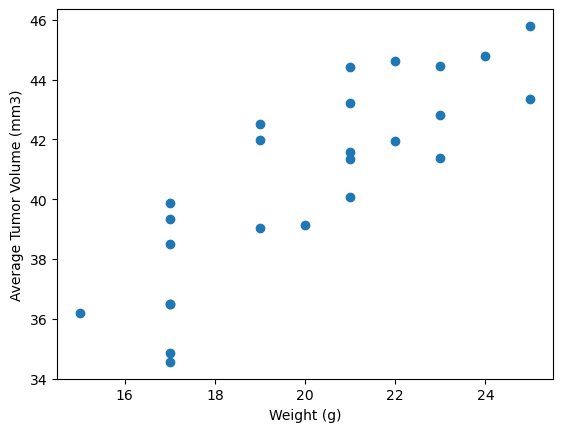

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin = mice_ID.loc[mice_ID["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")

avg_vol_capomulin = capomulin["Tumor Volume (mm3)"].mean()

mouse_weight = capomulin["Weight (g)"].unique()

plt.scatter(mouse_weight, avg_vol_capomulin)

plt.xlabel("Weight (g)")

plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

